In [15]:
import os.path as osp
import glob
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import os

In [16]:
from scipy.io import loadmat
mnist = loadmat(".\mnist-original.mat\mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
print(mnist_data.shape)
print(mnist_label.shape)

(70000, 784)
(70000,)


In [17]:
x = np.expand_dims(mnist_data, -1)
x = np.expand_dims(x, -1)
# x = x / 255.
y = mnist_label
print(x.shape, y.shape)

(70000, 784, 1, 1) (70000,)


In [18]:
print(x, y)

[[[[0]]

  [[0]]

  [[0]]

  ...

  [[0]]

  [[0]]

  [[0]]]


 [[[0]]

  [[0]]

  [[0]]

  ...

  [[0]]

  [[0]]

  [[0]]]


 [[[0]]

  [[0]]

  [[0]]

  ...

  [[0]]

  [[0]]

  [[0]]]


 ...


 [[[0]]

  [[0]]

  [[0]]

  ...

  [[0]]

  [[0]]

  [[0]]]


 [[[0]]

  [[0]]

  [[0]]

  ...

  [[0]]

  [[0]]

  [[0]]]


 [[[0]]

  [[0]]

  [[0]]

  ...

  [[0]]

  [[0]]

  [[0]]]] [0. 0. 0. ... 9. 9. 9.]


In [19]:
y = np.int_(y)
y

array([0, 0, 0, ..., 9, 9, 9])

In [20]:
print(x.shape, y.shape)

(70000, 784, 1, 1) (70000,)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
print(x_train.shape,'\n',x_test.shape)
print(y_train.shape,'\n',y_test.shape)

(56000, 784, 1, 1) 
 (14000, 784, 1, 1)
(56000,) 
 (14000,)


In [23]:
x_train.shape[1:]

(784, 1, 1)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# create the model
model = Sequential([
    Conv2D(6, 1, activation='relu', input_shape=(784, 1, 1)),
    MaxPool2D(1),
    Conv2D(16, 1, activation='relu',),
    MaxPool2D(1),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 784, 1, 6)         12        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 784, 1, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 784, 1, 16)        112       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 784, 1, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               1505400   
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [26]:
from tensorflow.keras.optimizers import Adam

# configure the model for training
# Обучение модели, критерий качества-categorical_crossentropy, adam учитывает скорость в градиентном спуске
# минимизируем loss, проверяем accuracy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [27]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=4, verbose=2)

Epoch 1/3
14000/14000 - 148s - loss: 0.2487 - acc: 0.9255 - val_loss: 0.1359 - val_acc: 0.9604
Epoch 2/3
14000/14000 - 160s - loss: 0.1198 - acc: 0.9640 - val_loss: 0.1266 - val_acc: 0.9630
Epoch 3/3
14000/14000 - 160s - loss: 0.0899 - acc: 0.9728 - val_loss: 0.1020 - val_acc: 0.9695


In [28]:
model.evaluate(x_test, y_test)

438/438 [==============================] - 2s 6ms/step - loss: 0.1020 - acc: 0.9695


[0.1020357757806778, 0.9695000052452087]

In [29]:
scores = model.evaluate(x_test, y_test)
print(scores)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

438/438 [==============================] - 2s 6ms/step - loss: 0.1020 - acc: 0.9695
[0.1020357757806778, 0.9695000052452087]

Accuracy: 96.95%


In [30]:
predictions = model.predict_classes(x_test)
true_class = 0
for ind, pred_class in enumerate(predictions):
    if pred_class == y_test[ind]:
        true_class += 1
    res = f'pred: {pred_class} true: {y_test[ind]} '
    if pred_class != y_test[ind]:
        res += 'WRONG!!!!!!!!'
    print(res)
print('true classification cnt', true_class)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
pred: 4 true: 4 
pred: 6 true: 6 
pred: 9 true: 9 
pred: 2 true: 2 
pred: 1 true: 1 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 1 true: 1 
pred: 1 true: 1 
pred: 0 true: 8 WRONG!!!!!!!!
pred: 9 true: 9 
pred: 7 true: 7 
pred: 6 true: 6 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 2 true: 2 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 3 true: 3 
pred: 0 true: 0 
pred: 9 true: 9 
pred: 4 true: 4 
pred: 4 true: 4 
pred: 2 true: 2 
pred: 0 true: 0 
pred: 8 true: 8 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 6 true: 6 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 3 true: 3 
pred: 8 true: 8 
pred: 6 true: 6 
pred: 6

pred: 9 true: 9 
pred: 6 true: 6 
pred: 9 true: 9 
pred: 0 true: 0 
pred: 1 true: 1 
pred: 6 true: 6 
pred: 1 true: 1 
pred: 5 true: 5 
pred: 9 true: 9 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 8 true: 8 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 5 true: 5 
pred: 2 true: 2 
pred: 0 true: 0 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 7 true: 7 
pred: 8 true: 8 
pred: 8 true: 8 
pred: 3 true: 3 
pred: 2 true: 2 
pred: 8 true: 8 
pred: 8 true: 8 
pred: 5 true: 5 
pred: 1 true: 1 
pred: 6 true: 6 
pred: 0 true: 0 
pred: 8 true: 8 
pred: 7 true: 7 
pred: 1 true: 1 
pred: 5 true: 5 
pred: 3 true: 8 WRONG!!!!!!!!
pred: 8 true: 8 
pred: 9 true: 9 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 2 true: 2 
pred: 5 true: 6 WRONG!!!!!!!!
pred: 5 true: 5 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 4 true: 4 
pred: 5 true: 5 
pred: 6 true: 6 
pred: 2 true: 2 
pred: 8 true: 8 
pred: 6 true: 6 
pred: 1 true: 1 
pred: 5 true: 8 WRONG!!!!!!!!
pred: 2 t

pred: 1 true: 1 
pred: 1 true: 1 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 6 true: 6 
pred: 2 true: 2 
pred: 2 true: 2 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 2 true: 2 
pred: 6 true: 6 
pred: 7 true: 7 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 9 true: 9 
pred: 4 true: 8 WRONG!!!!!!!!
pred: 9 true: 4 WRONG!!!!!!!!
pred: 6 true: 6 
pred: 8 true: 8 
pred: 4 true: 4 
pred: 7 true: 7 
pred: 9 true: 8 WRONG!!!!!!!!
pred: 2 true: 2 
pred: 1 true: 1 
pred: 9 true: 9 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 1 true: 1 
pred: 2 true: 2 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 4 true: 4 
pred: 4 true: 4 
pred: 7 true: 7 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 7 true: 7 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 4 true: 4 
pred: 6 true: 6 
pred: 8 true: 8 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 7 true: 7 
pred: 7 true: 7 
pred: 6 true: 6 
pred: 9 true: 9 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 6 t

pred: 5 true: 5 
pred: 5 true: 5 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 4 true: 4 
pred: 6 true: 6 
pred: 4 true: 4 
pred: 0 true: 0 
pred: 3 true: 3 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 1 true: 1 
pred: 5 true: 5 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 9 true: 3 WRONG!!!!!!!!
pred: 4 true: 4 
pred: 5 true: 5 
pred: 9 true: 9 
pred: 9 true: 9 
pred: 5 true: 5 
pred: 5 true: 5 
pred: 7 true: 7 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 2 true: 2 
pred: 9 true: 9 
pred: 6 true: 6 
pred: 6 true: 6 
pred: 2 true: 2 
pred: 0 true: 0 
pred: 2 true: 2 
pred: 3 true: 3 
pred: 2 true: 2 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 7 true: 7 
pred: 2 true: 2 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 3 true: 3 
pred: 8 true: 8 
pred: 6 true: 6 
pred: 5 true: 5 
pred: 3 true: 3 
pred: 0 true: 0 
pred: 2 true: 2 
pred: 9 true: 9 
pred: 7 true: 7 
pred: 7 true: 7 
pred: 1 true: 1 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 2 true: 2 
pred: 6 true: 6 
p

pred: 1 true: 1 
pred: 0 true: 0 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 2 true: 8 WRONG!!!!!!!!
pred: 5 true: 5 
pred: 9 true: 9 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 5 true: 5 
pred: 9 true: 0 WRONG!!!!!!!!
pred: 9 true: 9 
pred: 8 true: 8 
pred: 9 true: 9 
pred: 2 true: 2 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 2 true: 2 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 6 true: 6 
pred: 2 true: 2 
pred: 4 true: 4 
pred: 1 true: 1 
pred: 0 true: 0 
pred: 3 true: 3 
pred: 0 true: 0 
pred: 1 true: 1 
pred: 4 true: 4 
pred: 8 true: 8 
pred: 8 true: 8 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 5 true: 5 
pred: 1 true: 1 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 7 true: 7 
pred: 5 true: 5 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 2 true: 2 
pred: 5 true: 5 
pred: 8 true: 8 
pred: 4 true: 4 
pred: 3 true: 3 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 4 true: 4 
pred: 7 true: 7 
pred:

pred: 3 true: 3 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 1 true: 1 
pred: 1 true: 1 
pred: 1 true: 1 
pred: 1 true: 1 
pred: 8 true: 8 
pred: 5 true: 5 
pred: 8 true: 8 
pred: 4 true: 4 
pred: 8 true: 8 
pred: 5 true: 5 
pred: 3 true: 3 
pred: 9 true: 9 
pred: 4 true: 4 
pred: 8 true: 4 WRONG!!!!!!!!
pred: 3 true: 3 
pred: 5 true: 5 
pred: 9 true: 9 
pred: 5 true: 5 
pred: 8 true: 8 
pred: 3 true: 8 WRONG!!!!!!!!
pred: 3 true: 3 
pred: 9 true: 9 
pred: 6 true: 6 
pred: 2 true: 2 
pred: 9 true: 9 
pred: 5 true: 5 
pred: 5 true: 5 
pred: 0 true: 0 
pred: 3 true: 3 
pred: 8 true: 8 
pred: 9 true: 7 WRONG!!!!!!!!
pred: 0 true: 0 
pred: 5 true: 5 
pred: 9 true: 9 
pred: 9 true: 9 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 6 true: 6 
pred: 6 true: 6 
pred: 7 true: 7 
pred: 2 true: 2 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 4 true: 4 
pred: 7 true: 7 
pred: 2 true: 2 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 5 true: 5 
pred: 9 true: 9 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 1 t

pred: 6 true: 6 
pred: 0 true: 0 
pred: 2 true: 2 
pred: 6 true: 6 
pred: 7 true: 7 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 6 true: 6 
pred: 1 true: 1 
pred: 2 true: 3 WRONG!!!!!!!!
pred: 7 true: 7 
pred: 4 true: 4 
pred: 0 true: 0 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 2 true: 2 
pred: 9 true: 9 
pred: 8 true: 8 
pred: 1 true: 1 
pred: 2 true: 2 
pred: 6 true: 6 
pred: 4 true: 4 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 6 true: 6 
pred: 3 true: 3 
pred: 2 true: 2 
pred: 3 true: 3 
pred: 0 true: 0 
pred: 8 true: 8 
pred: 0 true: 0 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 9 true: 9 
pred: 2 true: 2 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 0 true: 0 
pred: 2 true: 2 
pred: 4 true: 4 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 9 true: 9 
pred: 3 true: 3 
pred: 8 true: 8 
pred: 4 true: 4 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 4 true: 4 
pred: 6 true: 6 
pred: 7 true: 7 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 5 true: 5 
pred: 1 true: 1 
pred: 1 true: 1 
pred: 6 true: 6 
p

pred: 2 true: 2 
pred: 6 true: 6 
pred: 3 true: 3 
pred: 6 true: 6 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 4 true: 4 
pred: 4 true: 4 
pred: 1 true: 1 
pred: 0 true: 0 
pred: 1 true: 1 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 0 true: 0 
pred: 3 true: 3 
pred: 1 true: 1 
pred: 9 true: 9 
pred: 5 true: 5 
pred: 1 true: 1 
pred: 6 true: 6 
pred: 7 true: 7 
pred: 6 true: 6 
pred: 2 true: 2 
pred: 9 true: 2 WRONG!!!!!!!!
pred: 5 true: 5 
pred: 7 true: 7 
pred: 1 true: 1 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 0 true: 0 
pred: 5 true: 5 
pred: 7 true: 7 
pred: 0 true: 0 
pred: 0 true: 0 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 4 true: 7 WRONG!!!!!!!!
pred: 0 true: 0 
pred: 9 true: 9 
pred: 0 true: 0 
pred: 7 true: 7 
pred: 4 true: 4 
pred: 0 true: 0 
pred: 4 true: 4 
pred: 8 true: 8 
pred: 7 true: 7 
pred: 2 true: 2 
pred: 3 true: 3 
pred: 7 true: 7 
pred: 1 true: 1 
pred: 5 true: 5 
pred: 3 true: 3 
pred: 4 true: 4 
pred: 9 true: 9 
pred: 2 true: 2 
pred:

In [ ]:
import pygame
FPS = 60
pygame.init()
w=300
h=300
WHITE = (255,255,255)
BLACK = (0,0,0)
sc = pygame.display.set_mode((w,h))
sc.fill(BLACK)
clock = pygame.time.Clock()
flag = False
pygame.display.update()
while 1:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.image.save(sc, "pic.jpg")
            exit()
            
        elif event.type == pygame.MOUSEBUTTONDOWN and event.button ==1:
            flag=True
            pos = pygame.mouse.get_pos()
            pygame.draw.circle(sc, WHITE, pos, 12)
            pygame.display.update()
            
        elif event.type==pygame.MOUSEMOTION:
            if flag:
                pygame.draw.circle(sc,WHITE, event.pos,12)
                pygame.display.update()
                
        elif event.type==pygame.MOUSEBUTTONUP and event.button ==1:
            flag = False
            
    clock.tick(FPS)

In [32]:
import glob
from PIL import Image
import numpy as np

from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
#     print(tva)
# mnist IMAGES are 28x28=784 pixels
    return tva

x=imageprepare('./pic.jpg')#file path here
x = np.array(x)
x = np.expand_dims(x, -1)
x = np.expand_dims(x, -1)
print(x.shape)

my_x_test = np.array([x])
print(my_x_test.shape)
my_y_test = [5]
my_predictions = model.predict_classes(my_x_test)
true_class = 0
for ind, pred_class in enumerate(my_predictions):
    if pred_class == my_y_test[ind]:
        true_class += 1
    res = f'pred: {pred_class} true: {my_y_test[ind]} '
    if pred_class != my_y_test[ind]:
        res += 'WRONG!!!!!!!!'
    print(res)
print('true classification cnt', true_class)

(784, 1, 1)
(1, 784, 1, 1)
pred: 5 true: 5 
true classification cnt 1


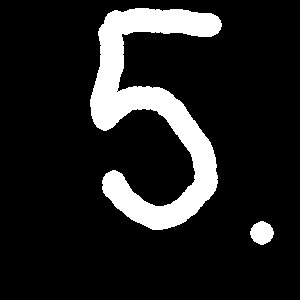